### Lab2: Scrapping + Feature Engineering + EDA
- In this lab first we installed important liabrires that we will use in the lab.
- After that we installed en_core_web_sm --> english core web small dictionary that is english dictionary for data preprocessing in NLP.
- In first program we checked why we are using numpy, so the program showed that the numpy is 100 times faster than simple python loop.
- In the main part, we extracted some information from 5 different web pages, using beautifulsoup library.
- After that we used the en_core_web_sm library for tokenizing our information, and counted the number of tokens sentences, etities and nouns.
- In the last part, we did some viualization using histogram and bar plots for the better understanding of data, we also calculated and plotted the tf_idf of the data.

In [1]:
!pip install requests beautifulsoup4 lxml pandas spacy matplotlib seaborn textblob

  Using cached spacy-3.8.11-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.15-cp312-cp312-win_amd64.whl.metadata (2.3 kB)
  Using cached cymem-2.0.13-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached preshed-3.0.12-cp312-cp312-win_amd64.whl.metadata (2.6 kB)
  Using cached thinc-8.3.10-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.2-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer_slim-0.21.0-py3-none-any.whl.metadata (16 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached blis-1.3.3-cp312-cp312

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
      --------------------------------------- 0.2/12.8 MB 1.4 MB/s eta 0:00:10
     -- ------------------------------------- 0.7/12.8 MB 4.1 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 5.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 6.7 MB/s eta 0:00:02
     ------ --------------------------------- 2.2/12.8 MB 7.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 7.5 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 7.6 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.8 MB 7.6 MB/s eta 0:00:02
     ----------- ---------------------------- 3.5/12.8 MB 7.3 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 7.5 MB/

In [3]:
!pip install seaborn

In [4]:
!pip install textblob

In [5]:
#importing important libraries
import numpy as np
import time
#selecting the size of data
size = 10000000
#generating random numbers of the selected size
data = np.random.rand(size)
#calculating the time using numpy
#computing start time
start_time = time.time()
#computing sum of all the numbers
sum_data = np.sum(data)
#computing the end time
end_time = time.time()

In [6]:
#computing the total time
total_time = end_time - start_time

In [7]:
#calculationg the time using for loop
starttime = time.time()
#new variable for storing the sum
newsum = 0
#for loop for adding all the values of data
for i in data:
    newsum += i
endtime = time.time()
totaltime = endtime - starttime
print("Time with numpy liabrary", total_time)
print("Time with simple for loop", totaltime)

Time with numpy liabrary 0.017847537994384766
Time with simple for loop 2.2171247005462646


In [8]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 330.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.8 MB 365.7 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.8 MB 711.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 831.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 947.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 951.8 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 955.7 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.8 MB 1.0 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 1.1 MB/s eta 0:00:02
   ------------- -------------------------- 0.6/1.8 MB 1.2 MB/s eta 0:00:02
   ----------------

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

urls = ['https://techncruncher.blogspot.com/2025/01/top-10-ai-tools-that-will-transform.html',
    'https://techncruncher.blogspot.com/2023/12/limewire-ai-studio-review-2023-details.html',
    'https://techncruncher.blogspot.com/2023/01/top-10-ai-tools-in-2023-that-will-make.html',
    'https://techncruncher.blogspot.com/2022/11/top-10-ai-content-generator-writer.html',
    'https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html'
      ]
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
articles = []

for url in urls:
    try:
        res = requests.get(url, headers = headers, timeout = 10)
        #print(res)
        res.raise_for_status()
        soup = BeautifulSoup(res.content, 'lxml')
        
        title = soup.find('h3', class_ = 'post-title')
        title = title.get_text(strip=True) if title else soup.title.get_text(strip=True)
        
        content_div = soup.find('div', class_ = 'post-body entry-content')
        if not content_div:
            print(f"[SKIP] No content: {url}")
            continue
        paragraphs = content_div.find_all('p')
        text = ' '.join(p.get_text(strip = True) for p in paragraphs)
        if len(text) > 100:
            articles.append({'url' : url, 'title' : title, 'text' : text})
        else:
            print(f"[SKIP] Too short: {url}")
        time.sleep(1)
    except Exception as e:
        print(f"[ERROR] {url} -> {e}")
df = pd.DataFrame(articles)
df.head()
            

[SKIP] Too short: https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html


,url,title,text
0,https://techncruncher.blogspot.com/2025/01/top...,Top 10 AI Tools That Will Transform Your Conte...,Looking to level up your content creation gam...
1,https://techncruncher.blogspot.com/2023/12/lim...,"LimeWire AI Studio Review 2023: Details, Prici...",In the rapidly advancing landscape of AI tech...
2,https://techncruncher.blogspot.com/2023/01/top...,Top 10 AI Tools in 2023 That Will Make Your Li...,"In this article, we explore the top 10 AI too..."
3,https://techncruncher.blogspot.com/2022/11/top...,Top 10 AI Content Generator & Writer Tools in ...,There are a number of different AI content ...


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [25]:
def extract_features(text):
    doc = nlp(text)
    return pd.Series({
        'num_tokens' : len(doc),
        'num_sentences' : len(list(doc.sents)),
        'num_entities' : len(doc.ents),
        'num_nouns' : len([t for t in doc if t.pos_ == 'NOUN'])
                           })
if not df.empty:
    features = df['text'].apply(extract_features)
    df = pd.concat([df, features], axis = 1)
    df['title_length'] = df['title'].apply(len)
else:
    print("⚠️ No articles found.")

In [26]:
features

,num_tokens,num_sentences,num_entities,num_nouns
0,1188,47,24,321
1,1723,65,103,420
2,1480,52,39,331
3,1319,63,89,271


In [27]:
df

,url,title,text,num_tokens,num_sentences,num_entities,num_nouns,title_length
0,https://techncruncher.blogspot.com/2025/01/top...,Top 10 AI Tools That Will Transform Your Conte...,Looking to level up your content creation gam...,1188,47,24,321,65
1,https://techncruncher.blogspot.com/2023/12/lim...,"LimeWire AI Studio Review 2023: Details, Prici...",In the rapidly advancing landscape of AI tech...,1723,65,103,420,59
2,https://techncruncher.blogspot.com/2023/01/top...,Top 10 AI Tools in 2023 That Will Make Your Li...,"In this article, we explore the top 10 AI too...",1480,52,39,331,55
3,https://techncruncher.blogspot.com/2022/11/top...,Top 10 AI Content Generator & Writer Tools in ...,There are a number of different AI content ...,1319,63,89,271,50


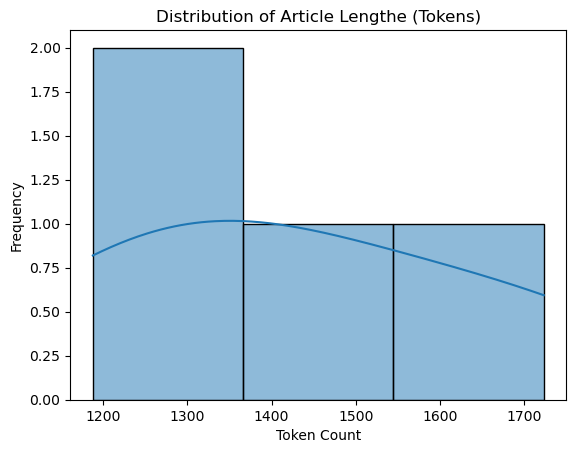

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    sns.histplot(df['num_tokens'], kde = True)
    plt.title("Distribution of Article Lengthe (Tokens)")
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.show()

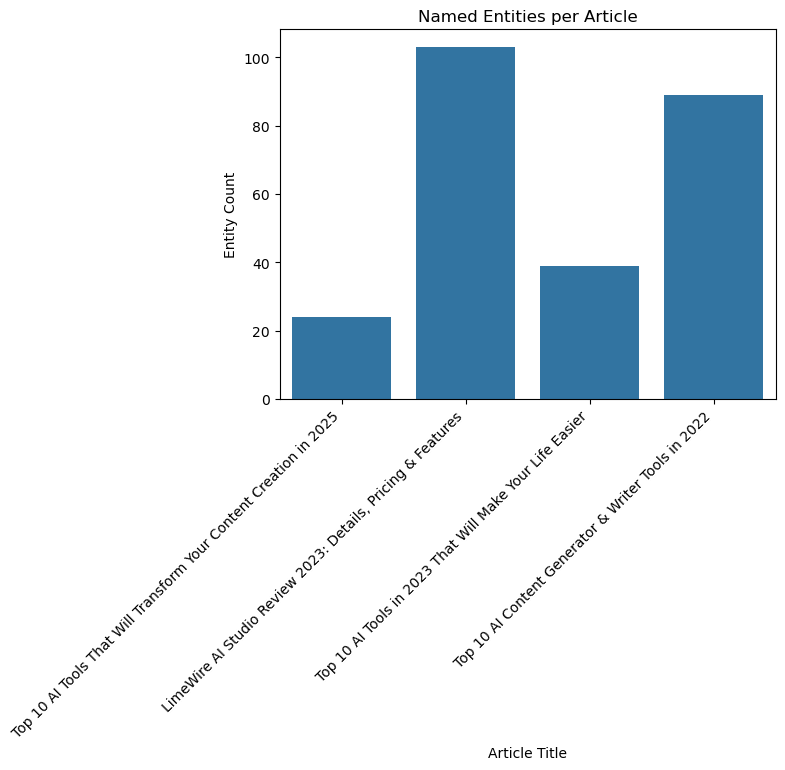

In [31]:
if not df.empty:
    sns.barplot(x='title', y='num_entities', data = df)
    plt.xticks(rotation = 45, ha = 'right')
    plt.title("Named Entities per Article")
    plt.ylabel("Entity Count")
    plt.xlabel("Article Title")
    plt.show()

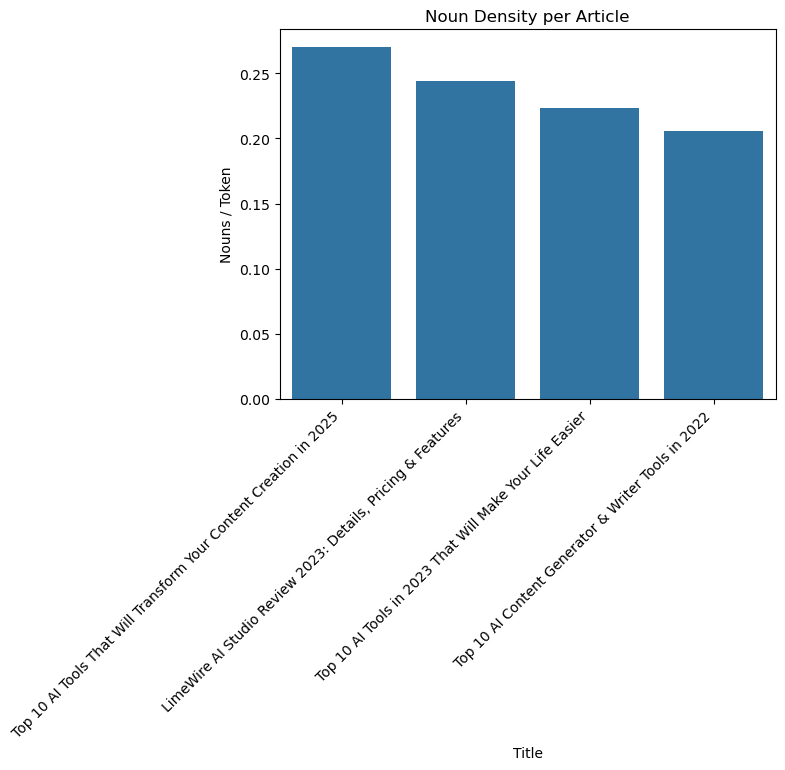

In [32]:
if not df.empty:
    df['noun_density'] = df['num_nouns'] / df['num_tokens']
    sns.barplot(x='title', y='noun_density', data = df)
    plt.xticks(rotation = 45, ha='right')
    plt.title("Noun Density per Article")
    plt.ylabel("Nouns / Token")
    plt.xlabel("Title")
    plt.show()

In [33]:
from collections import Counter

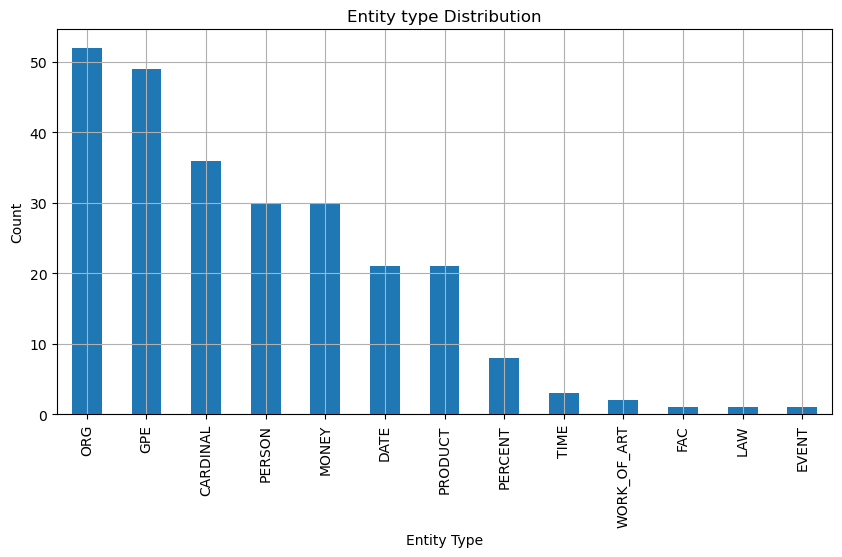

In [36]:
all_entities = []
for text in df['text']:
    doc = nlp(text)
    all_entities.extend([ent.label_ for ent in doc.ents])
entity_counts = Counter(all_entities) # it will return a dictionary of all entities. entity name as key and number of times they occur as value
entity_df = pd.DataFrame.from_dict(entity_counts, orient = 'index', columns = ['count']).sort_values('count', ascending=False)

if not entity_df.empty:
    entity_df.plot(kind='bar', figsize=(10,5), legend = False)
    plt.title("Entity type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Entity Type")
    plt.grid(True)
    plt.show()

In [37]:
entity_counts

Counter({'ORG': 52,
         'GPE': 49,
         'CARDINAL': 36,
         'PERSON': 30,
         'MONEY': 30,
         'DATE': 21,
         'PRODUCT': 21,
         'PERCENT': 8,
         'TIME': 3,
         'WORK_OF_ART': 2,
         'FAC': 1,
         'LAW': 1,
         'EVENT': 1})

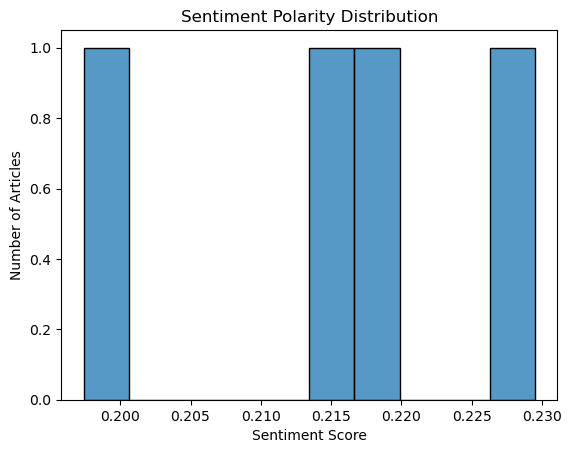

In [39]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(df['sentiment'], bins = 10)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.show()

In [40]:
df['sentiment']

0    0.229493
1    0.219387
2    0.197417
3    0.214853
Name: sentiment, dtype: float64

In [41]:
df[['title', 'title_length', 'num_tokens', 'num_sentences', 'num_entities', 'num_nouns', 'noun_density', 'sentiment']]

,title,title_length,num_tokens,num_sentences,num_entities,num_nouns,noun_density,sentiment
0,Top 10 AI Tools That Will Transform Your Conte...,65,1188,47,24,321,0.270202,0.229493
1,"LimeWire AI Studio Review 2023: Details, Prici...",59,1723,65,103,420,0.243761,0.219387
2,Top 10 AI Tools in 2023 That Will Make Your Li...,55,1480,52,39,331,0.223649,0.197417
3,Top 10 AI Content Generator & Writer Tools in ...,50,1319,63,89,271,0.205459,0.214853


In [42]:
!pip install scikit-learn

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer(stop_words='english', max_features = 20)

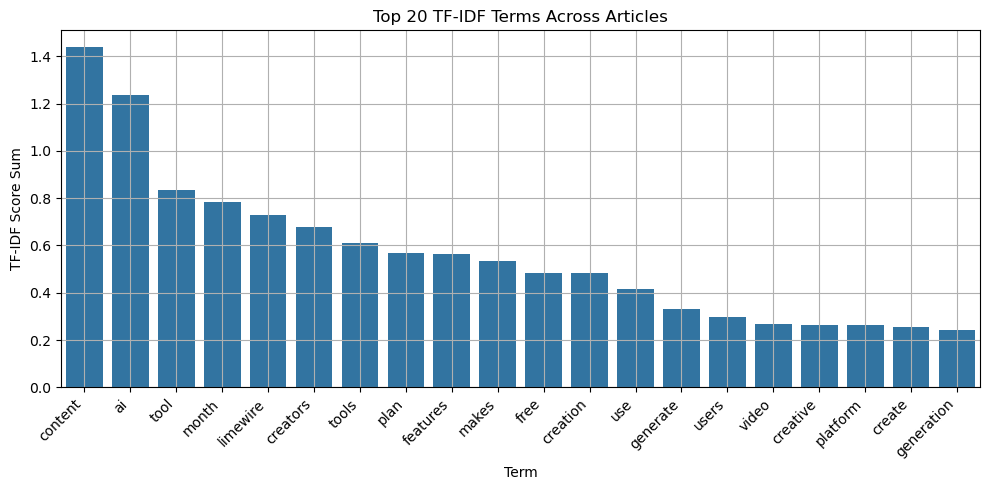

In [45]:
X = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("Top 20 TF-IDF Terms Across Articles")
plt.ylabel("TF-IDF Score Sum")
plt.xlabel("Term")
plt.xticks(rotation=45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
tfidf_sums

content       1.438203
ai            1.237947
tool          0.832933
month         0.783775
limewire      0.729283
creators      0.679878
tools         0.610609
plan          0.567677
features      0.564815
makes         0.534727
free          0.483813
creation      0.482234
use           0.415676
generate      0.332752
users         0.295475
video         0.266173
creative      0.263329
platform      0.261665
create        0.256515
generation    0.241861
dtype: float64

In [47]:
tfidf_sums

content       1.438203
ai            1.237947
tool          0.832933
month         0.783775
limewire      0.729283
creators      0.679878
tools         0.610609
plan          0.567677
features      0.564815
makes         0.534727
free          0.483813
creation      0.482234
use           0.415676
generate      0.332752
users         0.295475
video         0.266173
creative      0.263329
platform      0.261665
create        0.256515
generation    0.241861
dtype: float64